In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# FP1

### EDA

In [128]:
df = pd.read_excel(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT\Sales forecasting by product line and region\DF_FPD.xlsx')

df.head()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Period,Material Grp 3,REGION,Billings EURO,Blg Total Qty,BACKLOG EUR
0,201801,FPD,AMERICA,10633.37,155,10842.425825
1,201801,FPD,ASIA,1870.60,0,0.000000
2,201801,FPD,EUROPE,927386.03,22245,659920.438251
3,201802,FPD,AMERICA,44211.62,1321,25897.480424
4,201802,FPD,ASIA,2500.81,0,0.000000


In [130]:
df['Period'] = pd.to_datetime(df['Period'].astype(str), format='%Y%m')

In [132]:
df.shape

(279, 6)

In [134]:
df=df.drop(['Material Grp 3'],axis=1)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         279 non-null    datetime64[ns]
 1   REGION         279 non-null    object        
 2   Billings EURO  279 non-null    float64       
 3   Blg Total Qty  279 non-null    int64         
 4   BACKLOG EUR    279 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 11.0+ KB


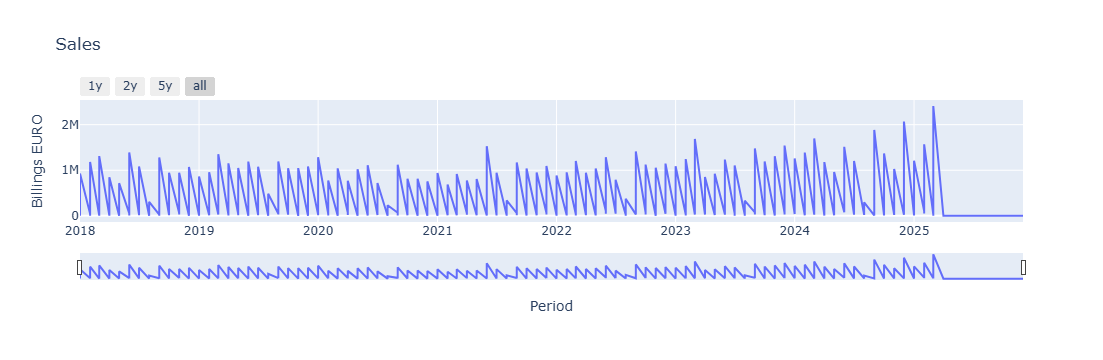

In [138]:
fig = px.line(df,x='Period',y='Billings EURO',title= 'Sales')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1y",step ="year",stepmode="backward"),
            dict(count=1,label="2y",step ="year",stepmode="backward"),
            dict(count=1,label="5y",step ="year",stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [139]:
df1 = df.copy ()

In [140]:
df1=df1.set_index('Period')

array([<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>], dtype=object)

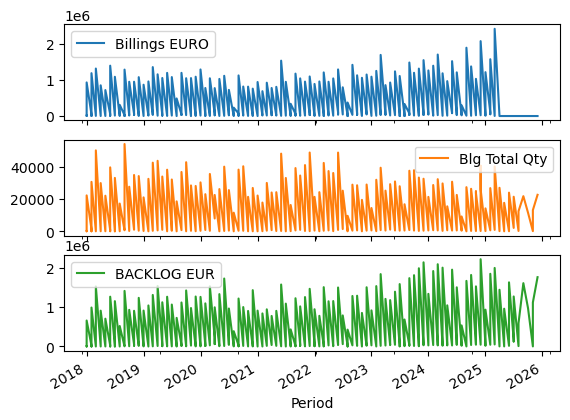

In [144]:
df1.plot(subplots=True)

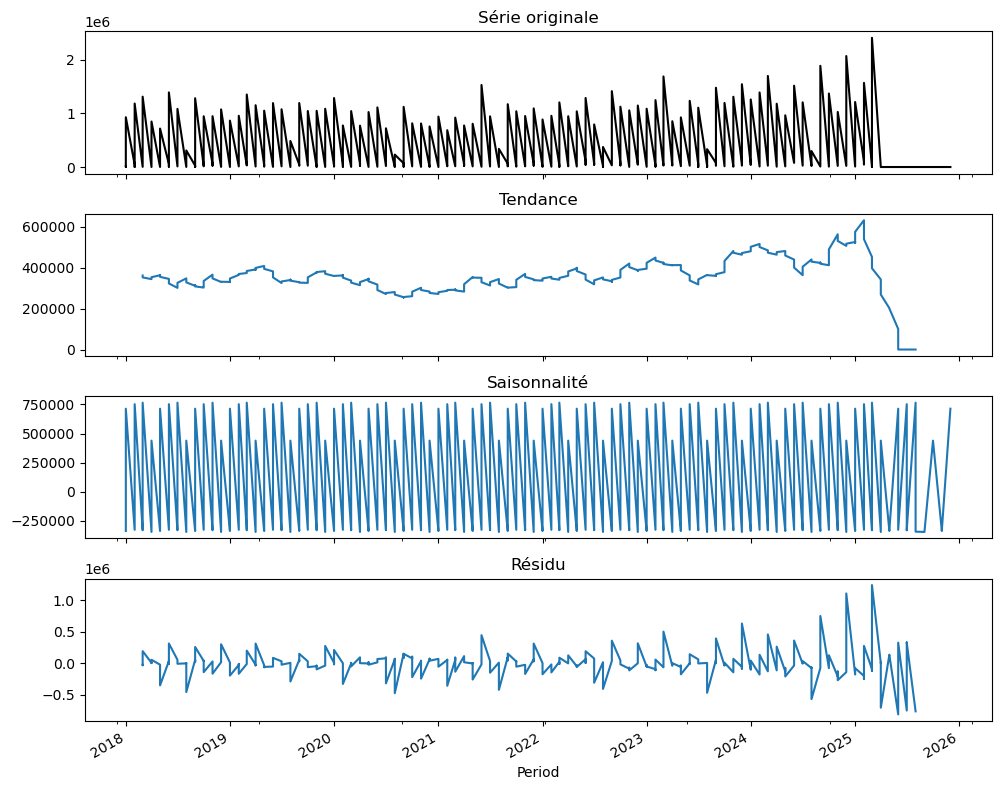

In [145]:
# Décomposition saisonnière
decomposition = seasonal_decompose(df1["Billings EURO"], model="additive", period=12)

# Affichage des composantes
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df1["Billings EURO"].plot(ax=axes[0], title="Série originale", color="black")
decomposition.trend.plot(ax=axes[1], title="Tendance")
decomposition.seasonal.plot(ax=axes[2], title="Saisonnalité")
decomposition.resid.plot(ax=axes[3], title="Résidu")

plt.tight_layout()
plt.show()

In [146]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  279
Columns  :  5

Features : 
 ['Period', 'REGION', 'Billings EURO', 'Blg Total Qty', 'BACKLOG EUR']

Missing values :   Period           False
REGION           False
Billings EURO    False
Blg Total Qty    False
BACKLOG EUR      False
dtype: bool

Unique values :  
 Period            96
REGION             3
Billings EURO    258
Blg Total Qty    251
BACKLOG EUR      271
dtype: int64


In [147]:
df.isnull().sum()

Period           0
REGION           0
Billings EURO    0
Blg Total Qty    0
BACKLOG EUR      0
dtype: int64

In [150]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialisation de l'encodeur avec sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Encodage de la colonne REGION
encoded_array = encoder.fit_transform(df[['REGION']])

# Récupération des noms de colonnes générés
column_names = encoder.get_feature_names_out(['REGION'])

# ✅ Vérification du format de sortie
print(f"Shape of encoded array: {encoded_array.shape}")  # Doit être (180, 3)
print(f"Feature names: {column_names}")  # Doit être ['REGION_AP', 'REGION_EU', 'REGION_NA']

# ✅ Convertir correctement en DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=column_names, index=df.index)

# ✅ Fusion avec df sans REGION
df = df.drop(columns=['REGION']).join(df_encoded)

# ✅ Affichage du DataFrame final
print(df.head())

Shape of encoded array: (279, 3)
Feature names: ['REGION_AMERICA' 'REGION_ASIA' 'REGION_EUROPE']
      Period  Billings EURO  Blg Total Qty    BACKLOG EUR  REGION_AMERICA  \
0 2018-01-01       10633.37            155   10842.425825             1.0   
1 2018-01-01        1870.60              0       0.000000             0.0   
2 2018-01-01      927386.03          22245  659920.438251             0.0   
3 2018-02-01       44211.62           1321   25897.480424             1.0   
4 2018-02-01        2500.81              0       0.000000             0.0   

   REGION_ASIA  REGION_EUROPE  
0          0.0            0.0  
1          1.0            0.0  
2          0.0            1.0  
3          0.0            0.0  
4          1.0            0.0  


In [151]:
df

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
0,2018-01-01,10633.37,155,1.084243e+04,1.0,0.0,0.0
1,2018-01-01,1870.60,0,0.000000e+00,0.0,1.0,0.0
2,2018-01-01,927386.03,22245,6.599204e+05,0.0,0.0,1.0
3,2018-02-01,44211.62,1321,2.589748e+04,1.0,0.0,0.0
4,2018-02-01,2500.81,0,0.000000e+00,0.0,1.0,0.0
...,...,...,...,...,...,...,...
274,2025-09-01,0.00,21766,1.609338e+06,0.0,0.0,1.0
275,2025-10-01,0.00,11488,9.730244e+05,0.0,0.0,1.0
276,2025-11-01,0.00,100,1.896463e+03,1.0,0.0,0.0
277,2025-11-01,0.00,13123,1.119649e+06,0.0,0.0,1.0


In [152]:
df.shape

(279, 7)

## To Change

In [154]:
# Trouver l'index
index = df[df["Period"] == "2024-01-01	"].index.values

In [156]:
index

array([216, 217, 218], dtype=int64)

In [157]:
# Trouver l'index
index = df[df["Period"] == "2025-03-01	"].index.values

In [158]:
index

array([258, 259, 260], dtype=int64)

In [159]:
# Création du régresseur binaire "vacances"
df['vacances'] = df['Period'].dt.month.isin([ 8]).astype(int)

In [160]:
df_train=df[:216]
df_test=df[216:261]

In [161]:
df_train.tail()

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
211,2023-11-01,17991.77,7442,2.972894e+04,0.0,1.0,0.0,0
212,2023-11-01,1308810.06,33300,1.987958e+06,0.0,0.0,1.0,0
213,2023-12-01,62302.34,356,3.129248e+04,1.0,0.0,0.0,0
214,2023-12-01,30657.35,8420,4.082767e+04,0.0,1.0,0.0,0
215,2023-12-01,1542331.61,32572,2.138641e+06,0.0,0.0,1.0,0


In [162]:
df_test.head()

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
216,2024-01-01,38749.08,651,3.957896e+04,1.0,0.0,0.0,0
217,2024-01-01,52400.22,501,2.727749e+04,0.0,1.0,0.0,0
218,2024-01-01,1258384.68,21313,1.337293e+06,0.0,0.0,1.0,0
219,2024-02-01,10018.82,652,4.041683e+04,1.0,0.0,0.0,0
220,2024-02-01,36489.60,1931,3.647135e+04,0.0,1.0,0.0,0


In [163]:
df_test.tail()

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
256,2025-02-01,49288.96,23720,8.654153e+04,0.0,1.0,0.0,0
257,2025-02-01,1567703.93,26756,1.847531e+06,0.0,0.0,1.0,0
258,2025-03-01,29100.22,863,6.568346e+04,1.0,0.0,0.0,0
259,2025-03-01,2211.00,3845,5.180181e+04,0.0,1.0,0.0,0
260,2025-03-01,2407305.94,40203,1.996170e+06,0.0,0.0,1.0,0


In [164]:
df_train = df_train.rename(columns={'Billings EURO': 'y', 'Period':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


model = Prophet(yearly_seasonality=True) #instantiate Prophet
model.add_regressor('Blg Total Qty')
model.add_regressor('BACKLOG EUR')
model.add_regressor('REGION_AMERICA')
model.add_regressor('REGION_ASIA')
model.add_regressor('REGION_EUROPE')
model.add_regressor('vacances')

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



In [168]:
#Solution

In [176]:
#Vérifier la présence de valeurs infinies
print(np.isinf(df_train['y']).sum())  # Nombre de valeurs infinies

4


In [182]:
#Remplacer les valeurs infinies
df_train['y'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_10148\1334174677.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [183]:
#Supprimer les lignes avec NaN
df_train.dropna(subset=['y'], inplace=True)


In [184]:
df_train

,ds,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances,y_orig
0,2018-01-01,9.271752,155,1.084243e+04,1.0,0.0,0.0,0,10633.37
1,2018-01-01,7.534015,0,0.000000e+00,0.0,1.0,0.0,0,1870.60
2,2018-01-01,13.740125,22245,6.599204e+05,0.0,0.0,1.0,0,927386.03
3,2018-02-01,10.696743,1321,2.589748e+04,1.0,0.0,0.0,0,44211.62
4,2018-02-01,7.824370,0,0.000000e+00,0.0,1.0,0.0,0,2500.81
...,...,...,...,...,...,...,...,...,...
211,2023-11-01,9.797670,7442,2.972894e+04,0.0,1.0,0.0,0,17991.77
212,2023-11-01,14.084629,33300,1.987958e+06,0.0,0.0,1.0,0,1308810.06
213,2023-12-01,11.039754,356,3.129248e+04,1.0,0.0,0.0,0,62302.34
214,2023-12-01,10.330628,8420,4.082767e+04,0.0,1.0,0.0,0,30657.35


In [185]:
model.fit(df_train)

10:48:54 - cmdstanpy - INFO - Chain [1] start processing
10:48:54 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
df_test = df_test.rename(columns={'Billings EURO': 'y', 'Period':'ds'})
df_test.columns

Index(['ds', 'y', 'Blg Total Qty', 'BACKLOG EUR', 'REGION_AMERICA',
       'REGION_ASIA', 'REGION_EUROPE', 'vacances'],
      dtype='object')

In [188]:
future_data=df_test[['ds', 'Blg Total Qty', 'BACKLOG EUR', 'REGION_AMERICA', 'REGION_ASIA', 'REGION_EUROPE', 'vacances']]

In [190]:
future_data.head()

,ds,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
216,2024-01-01,651,3.957896e+04,1.0,0.0,0.0,0
217,2024-01-01,501,2.727749e+04,0.0,1.0,0.0,0
218,2024-01-01,21313,1.337293e+06,0.0,0.0,1.0,0
219,2024-02-01,652,4.041683e+04,1.0,0.0,0.0,0
220,2024-02-01,1931,3.647135e+04,0.0,1.0,0.0,0


In [191]:
forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2024-01-01,9.765558,8.624142,10.833919
1,2024-01-01,9.332772,8.179679,10.438891
2,2024-01-01,13.413268,12.427421,14.532888
3,2024-02-01,10.052241,8.979346,11.122908
4,2024-02-01,9.678386,8.501272,10.795994
5,2024-02-01,13.675175,12.596741,14.756947
6,2024-03-01,10.079932,8.966920,11.288742
7,2024-03-01,10.114892,9.031288,11.224948
8,2024-03-01,13.756777,12.629346,14.787918
9,2024-04-01,10.452017,9.429293,11.553559


In [192]:
df_test.shape , forecast_data.shape

((45, 8), (45, 37))

In [194]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE((df_test['y']), np.exp(forecast_data['yhat'])))
print("RMSE : % f" %(rmse))

RMSE :  305773.984783


In [195]:
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(df_test['y'], np.exp(forecast_data['yhat']))
mae_percentage = (mae / df_test['y'].mean()) * 100

print("MAE : % f" % mae)
print("MAE en %% : % f%%" % mae_percentage)


MAE :  150272.938873
MAE en % :  30.217091%


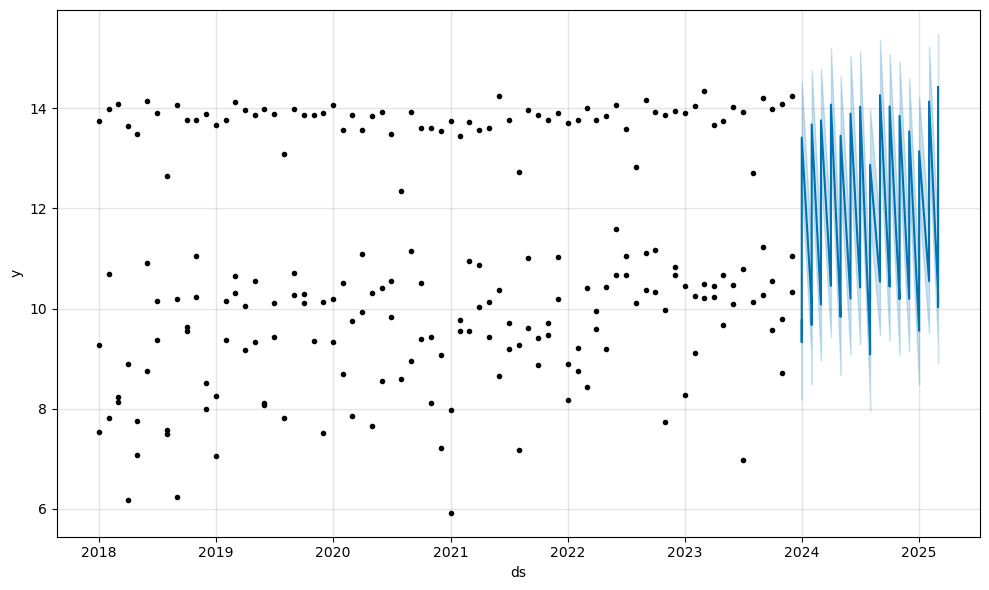

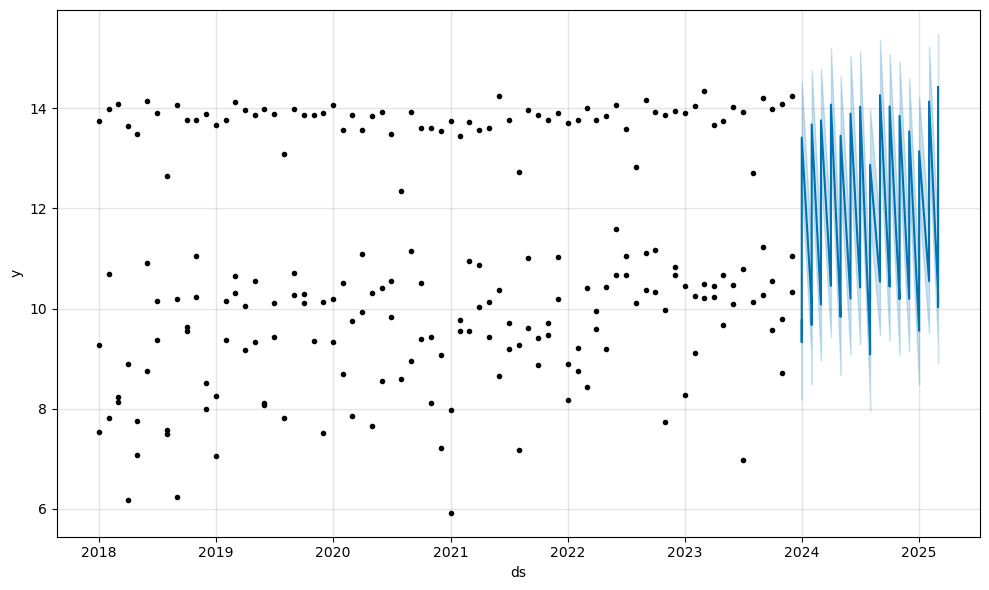

In [196]:
model.plot(forecast_data)

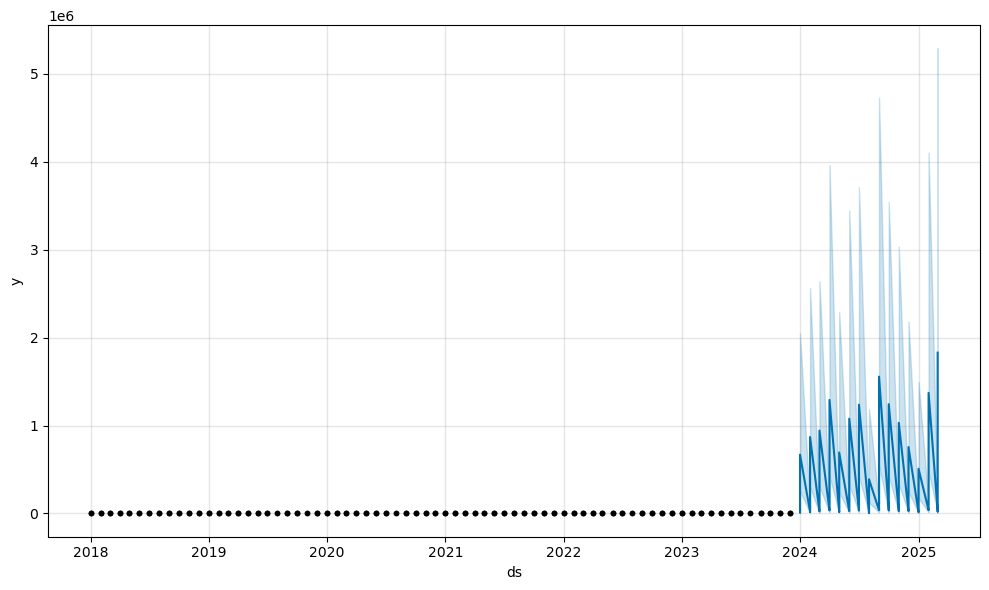

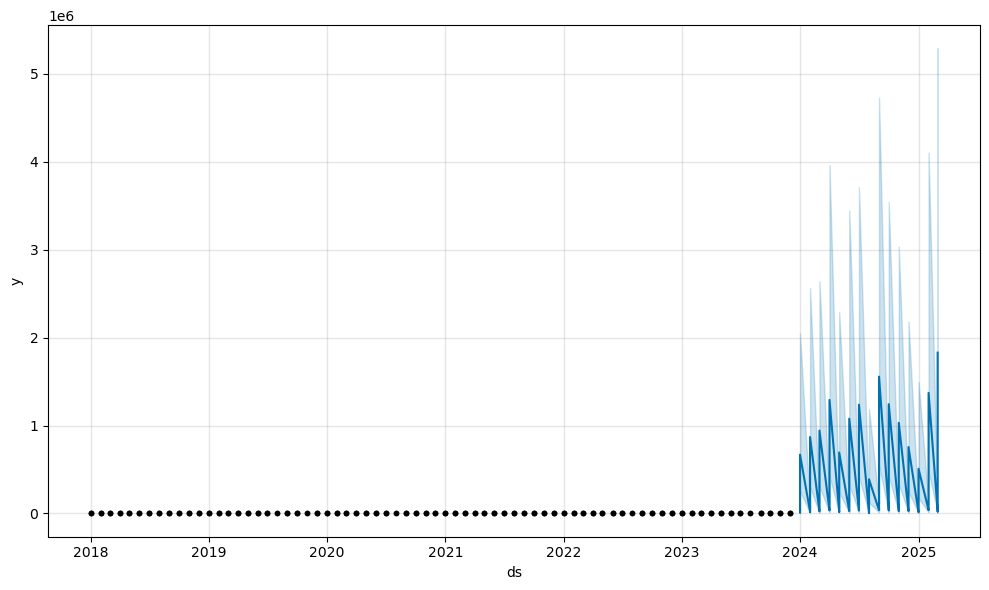

In [199]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model.plot(forecast_data_orig)

In [201]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_test["y"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [202]:
final_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BACKLOG EUR,BACKLOG EUR_lower,BACKLOG EUR_upper,Blg Total Qty,...,vacances,vacances_lower,vacances_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-01,11.046628,5564.384697,5.071205e+04,11.046628,11.046628,0.227432,0.227432,0.227432,-0.527894,...,0.0,0.0,0.0,-0.234285,-0.234285,-0.234285,0.0,0.0,0.0,17423.198044
1,2024-01-01,11.046628,3567.709700,3.416275e+04,11.046628,11.046628,0.234968,0.234968,0.234968,-0.534617,...,0.0,0.0,0.0,-0.234285,-0.234285,-0.234285,0.0,0.0,0.0,11302.422543
2,2024-01-01,11.046628,249551.520045,2.049053e+06,11.046628,11.046628,-0.567657,-0.567657,-0.567657,0.398205,...,0.0,0.0,0.0,-0.234285,-0.234285,-0.234285,0.0,0.0,0.0,668818.335943
3,2024-02-01,11.059966,7937.439255,6.770449e+04,11.059966,11.059966,0.226918,0.226918,0.226918,-0.527849,...,0.0,0.0,0.0,0.039530,0.039530,0.039530,0.0,0.0,0.0,23207.738132
4,2024-02-01,11.059966,4921.022539,4.882482e+04,11.059966,11.059966,0.229336,0.229336,0.229336,-0.470522,...,0.0,0.0,0.0,0.039530,0.039530,0.039530,0.0,0.0,0.0,15968.697927


In [203]:
final_df.columns.values

array(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'BACKLOG EUR', 'BACKLOG EUR_lower',
       'BACKLOG EUR_upper', 'Blg Total Qty', 'Blg Total Qty_lower',
       'Blg Total Qty_upper', 'REGION_AMERICA', 'REGION_AMERICA_lower',
       'REGION_AMERICA_upper', 'REGION_ASIA', 'REGION_ASIA_lower',
       'REGION_ASIA_upper', 'REGION_EUROPE', 'REGION_EUROPE_lower',
       'REGION_EUROPE_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'vacances', 'vacances_lower',
       'vacances_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'], dtype=object)

In [206]:
df1 = final_df[["ds","yhat","yhat_upper","yhat_lower"]]

In [208]:
df1.head()

,ds,yhat,yhat_upper,yhat_lower
0,2024-01-01,17423.198044,5.071205e+04,5564.384697
1,2024-01-01,11302.422543,3.416275e+04,3567.709700
2,2024-01-01,668818.335943,2.049053e+06,249551.520045
3,2024-02-01,23207.738132,6.770449e+04,7937.439255
4,2024-02-01,15968.697927,4.882482e+04,4921.022539


In [210]:
df_test = df_test.reset_index(drop=True)

In [213]:
df_test.head()

,ds,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
0,2024-01-01,38749.08,651,3.957896e+04,1.0,0.0,0.0,0
1,2024-01-01,52400.22,501,2.727749e+04,0.0,1.0,0.0,0
2,2024-01-01,1258384.68,21313,1.337293e+06,0.0,0.0,1.0,0
3,2024-02-01,10018.82,652,4.041683e+04,1.0,0.0,0.0,0
4,2024-02-01,36489.60,1931,3.647135e+04,0.0,1.0,0.0,0


In [216]:
df1.shape,df_test.shape

((45, 4), (45, 8))

In [217]:
# Joindre les deux DataFrames sur l'index
df1 = df1.join(df_test, rsuffix='_test')

In [218]:
df1.head(10)

,ds,yhat,yhat_upper,yhat_lower,ds_test,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,vacances
0,2024-01-01,17423.198044,5.071205e+04,5564.384697,2024-01-01,38749.08,651,3.957896e+04,1.0,0.0,0.0,0
1,2024-01-01,11302.422543,3.416275e+04,3567.709700,2024-01-01,52400.22,501,2.727749e+04,0.0,1.0,0.0,0
2,2024-01-01,668818.335943,2.049053e+06,249551.520045,2024-01-01,1258384.68,21313,1.337293e+06,0.0,0.0,1.0,0
3,2024-02-01,23207.738132,6.770449e+04,7937.439255,2024-02-01,10018.82,652,4.041683e+04,1.0,0.0,0.0,0
4,2024-02-01,15968.697927,4.882482e+04,4921.022539,2024-02-01,36489.60,1931,3.647135e+04,0.0,1.0,0.0,0
5,2024-02-01,869066.402764,2.563660e+06,295593.689444,2024-02-01,1388523.74,28677,1.917216e+06,0.0,0.0,1.0,0
6,2024-03-01,23859.362141,7.991689e+04,7839.415298,2024-03-01,24242.51,530,2.793222e+04,1.0,0.0,0.0,0
7,2024-03-01,24708.245190,7.497784e+04,8360.618357,2024-03-01,75321.90,11608,7.358604e+04,0.0,1.0,0.0,0
8,2024-03-01,942958.339147,2.644303e+06,305390.412967,2024-03-01,1696812.71,32297,2.090488e+06,0.0,0.0,1.0,0
9,2024-04-01,34614.134441,1.041470e+05,12447.719327,2024-04-01,6646.36,263,1.999072e+04,1.0,0.0,0.0,0


In [219]:
# Reconstruction de la colonne REGION
df1["REGION"] = df1[["REGION_AMERICA", "REGION_ASIA", "REGION_EUROPE"]].idxmax(axis=1)
df1["REGION"] = df1["REGION"].str.replace("REGION_", "")

# Suppression des colonnes one-hot encodées (facultatif)
df1 = df1.drop(columns=["REGION_AMERICA", "REGION_ASIA", "REGION_EUROPE"])

In [220]:
df1.head(10)

,ds,yhat,yhat_upper,yhat_lower,ds_test,y,Blg Total Qty,BACKLOG EUR,vacances,REGION
0,2024-01-01,17423.198044,5.071205e+04,5564.384697,2024-01-01,38749.08,651,3.957896e+04,0,AMERICA
1,2024-01-01,11302.422543,3.416275e+04,3567.709700,2024-01-01,52400.22,501,2.727749e+04,0,ASIA
2,2024-01-01,668818.335943,2.049053e+06,249551.520045,2024-01-01,1258384.68,21313,1.337293e+06,0,EUROPE
3,2024-02-01,23207.738132,6.770449e+04,7937.439255,2024-02-01,10018.82,652,4.041683e+04,0,AMERICA
4,2024-02-01,15968.697927,4.882482e+04,4921.022539,2024-02-01,36489.60,1931,3.647135e+04,0,ASIA
5,2024-02-01,869066.402764,2.563660e+06,295593.689444,2024-02-01,1388523.74,28677,1.917216e+06,0,EUROPE
6,2024-03-01,23859.362141,7.991689e+04,7839.415298,2024-03-01,24242.51,530,2.793222e+04,0,AMERICA
7,2024-03-01,24708.245190,7.497784e+04,8360.618357,2024-03-01,75321.90,11608,7.358604e+04,0,ASIA
8,2024-03-01,942958.339147,2.644303e+06,305390.412967,2024-03-01,1696812.71,32297,2.090488e+06,0,EUROPE
9,2024-04-01,34614.134441,1.041470e+05,12447.719327,2024-04-01,6646.36,263,1.999072e+04,0,AMERICA


In [221]:
df2 = df1[['ds','yhat','yhat_upper','yhat_lower','y','BACKLOG EUR',]]

In [222]:
df2.head()

,ds,yhat,yhat_upper,yhat_lower,y,BACKLOG EUR
0,2024-01-01,17423.198044,5.071205e+04,5564.384697,38749.08,3.957896e+04
1,2024-01-01,11302.422543,3.416275e+04,3567.709700,52400.22,2.727749e+04
2,2024-01-01,668818.335943,2.049053e+06,249551.520045,1258384.68,1.337293e+06
3,2024-02-01,23207.738132,6.770449e+04,7937.439255,10018.82,4.041683e+04
4,2024-02-01,15968.697927,4.882482e+04,4921.022539,36489.60,3.647135e+04


In [223]:
df1_grouped = df2.groupby("ds", as_index=False).sum()

In [225]:
df1_grouped.head()

,ds,yhat,yhat_upper,yhat_lower,y,BACKLOG EUR
0,2024-01-01,6.975440e+05,2.133928e+06,258683.614442,1349533.98,1.404150e+06
1,2024-02-01,9.082428e+05,2.680190e+06,308452.151239,1435032.16,1.994104e+06
2,2024-03-01,9.915259e+05,2.799197e+06,321590.446623,1796377.12,2.192006e+06
3,2024-04-01,1.390471e+06,4.257752e+06,454846.129531,1246702.18,2.087144e+06
4,2024-05-01,7.318997e+05,2.402243e+06,251409.087955,1049727.48,1.137460e+06


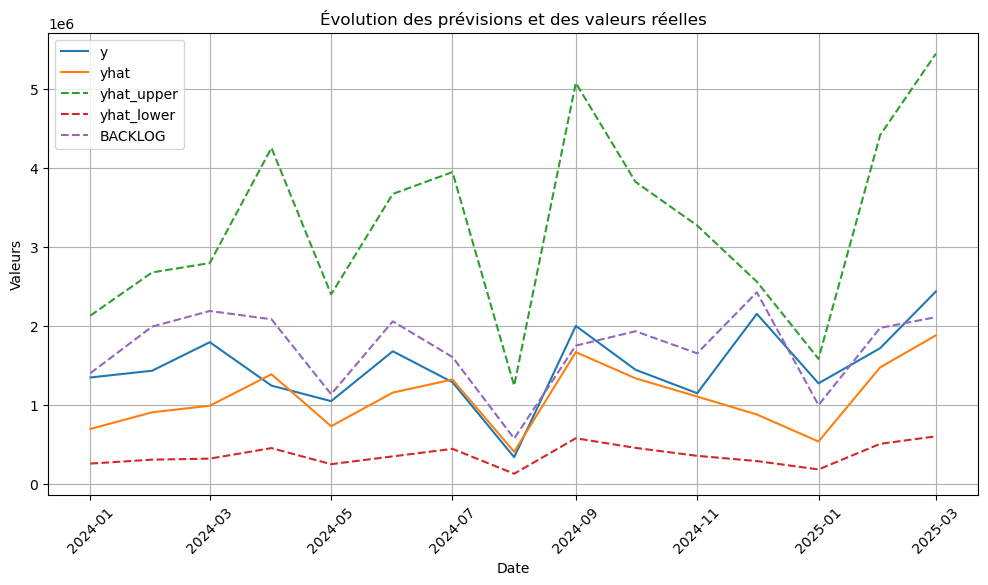

In [226]:
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracer les lignes pour chaque colonne
sns.lineplot(data=df1_grouped, x="ds", y="y", label="y")
sns.lineplot(data=df1_grouped, x="ds", y="yhat", label="yhat")
sns.lineplot(data=df1_grouped, x="ds", y="yhat_upper", label="yhat_upper", linestyle="dashed")
sns.lineplot(data=df1_grouped, x="ds", y="yhat_lower", label="yhat_lower", linestyle="dashed")
sns.lineplot(data=df1_grouped, x="ds", y="BACKLOG EUR", label="BACKLOG", linestyle="dashed")

# Personnalisation
plt.xlabel("Date")
plt.ylabel("Valeurs")
plt.title("Évolution des prévisions et des valeurs réelles")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


In [227]:
df1_grouped.tail(10)

,ds,yhat,yhat_upper,yhat_lower,y,BACKLOG EUR
5,2024-06-01,1.158161e+06,3.674854e+06,349865.615638,1681528.91,2.060820e+06
6,2024-07-01,1.323334e+06,3.951260e+06,445495.803000,1289211.87,1.608232e+06
7,2024-08-01,4.078490e+05,1.245803e+06,130296.759398,339999.06,5.762144e+05
8,2024-09-01,1.670663e+06,5.080735e+06,579464.470040,2002663.96,1.753064e+06
9,2024-10-01,1.338812e+06,3.827683e+06,457569.446295,1447595.09,1.935270e+06
10,2024-11-01,1.107951e+06,3.274318e+06,356797.404767,1149936.02,1.655355e+06
11,2024-12-01,8.807296e+05,2.562940e+06,290918.983440,2155944.14,2.428625e+06
12,2025-01-01,5.384383e+05,1.585145e+06,184430.592452,1275195.41,9.995170e+05
13,2025-02-01,1.477937e+06,4.420647e+06,509152.917197,1720933.32,1.977929e+06
14,2025-03-01,1.882817e+06,5.450972e+06,603716.372346,2438617.16,2.113655e+06
